In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [273]:
df=pd.read_csv('real_pred_misisng.csv')
df

,device_state,network_type,charging,cpu_usage,ram_usage,brightness,screen_on_time,apps_running,ambient_temp,cpu_temp,battery_temp,overheating
0,idle,5g,yes,11,10.0,22,0.22,5.0,33.88,44.84,36.09,0
1,gaming,wifi,no,73,81.8,94,6.55,19.0,26.99,62.08,41.86,1
2,normal_use,5g,no,22,38.8,57,1.15,10.0,19.73,43.50,33.95,0
3,gaming,4g,no,75,93.7,92,5.87,19.0,26.65,62.58,45.07,1
4,video_streaming,5g,no,74,78.2,84,4.21,15.0,23.96,55.97,43.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,normal_use,4g,no,46,72.7,34,1.05,8.0,25.49,47.22,37.19,1
9996,gaming,5g,yes,99,91.4,83,4.85,21.0,25.82,66.33,50.81,1
9997,gaming,wifi,yes,70,80.1,85,4.56,17.0,31.85,61.18,46.13,1
9998,normal_use,4g,no,29,31.1,41,3.78,8.0,34.51,45.72,38.63,1


In [274]:
df.size

120000

In [275]:
df.shape

(10000, 12)

In [276]:
df.head()

,device_state,network_type,charging,cpu_usage,ram_usage,brightness,screen_on_time,apps_running,ambient_temp,cpu_temp,battery_temp,overheating
0,idle,5g,yes,11,10.0,22,0.22,5.0,33.88,44.84,36.09,0
1,gaming,wifi,no,73,81.8,94,6.55,19.0,26.99,62.08,41.86,1
2,normal_use,5g,no,22,38.8,57,1.15,10.0,19.73,43.50,33.95,0
3,gaming,4g,no,75,93.7,92,5.87,19.0,26.65,62.58,45.07,1
4,video_streaming,5g,no,74,78.2,84,4.21,15.0,23.96,55.97,43.84,1


In [277]:
df.tail()

,device_state,network_type,charging,cpu_usage,ram_usage,brightness,screen_on_time,apps_running,ambient_temp,cpu_temp,battery_temp,overheating
9995,normal_use,4g,no,46,72.7,34,1.05,8.0,25.49,47.22,37.19,1
9996,gaming,5g,yes,99,91.4,83,4.85,21.0,25.82,66.33,50.81,1
9997,gaming,wifi,yes,70,80.1,85,4.56,17.0,31.85,61.18,46.13,1
9998,normal_use,4g,no,29,31.1,41,3.78,8.0,34.51,45.72,38.63,1
9999,idle,5g,yes,9,22.1,37,0.46,1.0,33.03,45.91,36.46,1


In [278]:
df.isna().sum()

device_state       0
network_type       0
charging           0
cpu_usage          0
ram_usage         17
brightness         0
screen_on_time    48
apps_running      23
ambient_temp      27
cpu_temp           0
battery_temp       0
overheating        0
dtype: int64

In [279]:
df['ram_usage']=df['ram_usage'].fillna(df['ram_usage'].mode() [0])
df['screen_on_time']=df['screen_on_time'].fillna(df['screen_on_time'].mean())
df['ambient_temp']=df['ambient_temp'].fillna(df['ambient_temp'].mean())
df['apps_running']=df['apps_running'].fillna(df['apps_running'].mode() [0])

<Axes: ylabel='cpu_usage'>

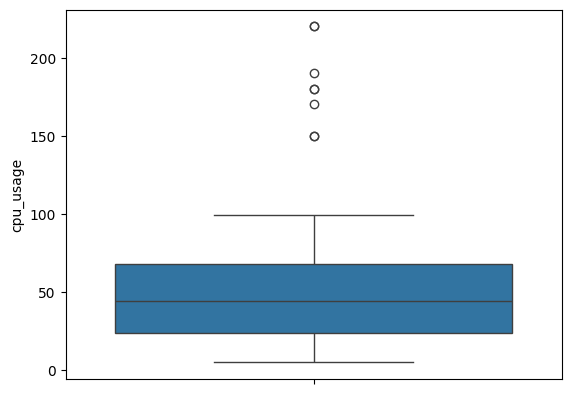

In [280]:
sns.boxplot(df['cpu_usage'])

In [281]:
Q1=df['cpu_usage'].quantile(0.25)
Q3=df['cpu_usage'].quantile(0.75)

IQR=Q3-Q1

lower= Q1-1.5*IQR
upper=Q3+1.5*IQR

(lower,upper)

df=df[(df['cpu_usage']>=lower)&(df['cpu_usage']<=upper)]

<Axes: ylabel='ram_usage'>

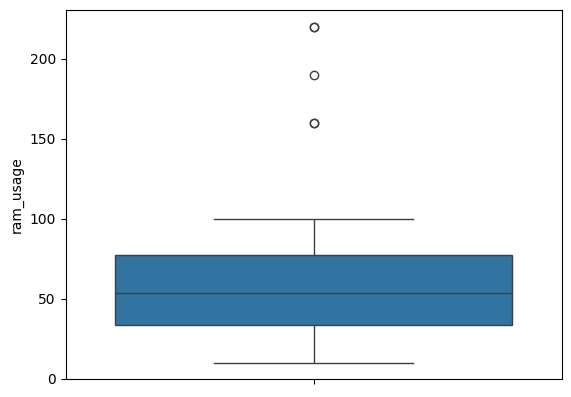

In [282]:
sns.boxplot(df['ram_usage'])

In [283]:
Q1=df['ram_usage'].quantile(0.25)
Q3=df['ram_usage'].quantile(0.75)

IQR= Q3-Q1

lower= Q1-1.5*IQR
upper=Q3+1.5*IQR

df=df[(df['ram_usage']>=lower)&(df['ram_usage']<=upper)]

Encoding

In [284]:
df.corr(numeric_only=True)

,cpu_usage,ram_usage,brightness,screen_on_time,apps_running,ambient_temp,cpu_temp,battery_temp,overheating
cpu_usage,1.000000,0.934836,0.840988,0.797950,0.908182,-0.006347,0.943968,0.895151,0.656531
ram_usage,0.934836,1.000000,0.792950,0.750187,0.847808,-0.006353,0.884609,0.834794,0.621457
brightness,0.840988,0.792950,1.000000,0.762282,0.761635,0.005216,0.889242,0.752347,0.672859
screen_on_time,0.797950,0.750187,0.762282,1.000000,0.725748,-0.003778,0.784301,0.722000,0.573994
apps_running,0.908182,0.847808,0.761635,0.725748,1.000000,0.000613,0.856472,0.814847,0.583519
ambient_temp,-0.006347,-0.006353,0.005216,-0.003778,0.000613,1.000000,0.082946,0.093096,0.051245
cpu_temp,0.943968,0.884609,0.889242,0.784301,0.856472,0.082946,1.000000,0.890046,0.707693
battery_temp,0.895151,0.834794,0.752347,0.722000,0.814847,0.093096,0.890046,1.000000,0.613696
overheating,0.656531,0.621457,0.672859,0.573994,0.583519,0.051245,0.707693,0.613696,1.000000


In [285]:

df=df.drop(['cpu_temp','battery_temp'],axis=1)

In [286]:
df

,device_state,network_type,charging,cpu_usage,ram_usage,brightness,screen_on_time,apps_running,ambient_temp,overheating
0,idle,5g,yes,11,10.0,22,0.22,5.0,33.88,0
1,gaming,wifi,no,73,81.8,94,6.55,19.0,26.99,1
2,normal_use,5g,no,22,38.8,57,1.15,10.0,19.73,0
3,gaming,4g,no,75,93.7,92,5.87,19.0,26.65,1
4,video_streaming,5g,no,74,78.2,84,4.21,15.0,23.96,1
...,...,...,...,...,...,...,...,...,...,...
9995,normal_use,4g,no,46,72.7,34,1.05,8.0,25.49,1
9996,gaming,5g,yes,99,91.4,83,4.85,21.0,25.82,1
9997,gaming,wifi,yes,70,80.1,85,4.56,17.0,31.85,1
9998,normal_use,4g,no,29,31.1,41,3.78,8.0,34.51,1


In [287]:
df=pd.get_dummies(df,columns=['device_state','network_type','charging'],drop_first=True)

In [288]:
x=df.drop(['overheating'],axis=1)

In [289]:
x

,cpu_usage,ram_usage,brightness,screen_on_time,apps_running,ambient_temp,device_state_idle,device_state_normal_use,device_state_video_streaming,network_type_5g,network_type_wifi,charging_yes
0,11,10.0,22,0.22,5.0,33.88,True,False,False,True,False,True
1,73,81.8,94,6.55,19.0,26.99,False,False,False,False,True,False
2,22,38.8,57,1.15,10.0,19.73,False,True,False,True,False,False
3,75,93.7,92,5.87,19.0,26.65,False,False,False,False,False,False
4,74,78.2,84,4.21,15.0,23.96,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,46,72.7,34,1.05,8.0,25.49,False,True,False,False,False,False
9996,99,91.4,83,4.85,21.0,25.82,False,False,False,True,False,True
9997,70,80.1,85,4.56,17.0,31.85,False,False,False,False,True,True
9998,29,31.1,41,3.78,8.0,34.51,False,True,False,False,False,False


In [290]:
y=df['overheating']
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: overheating, Length: 9987, dtype: int64

In [291]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,cpu_usage,ram_usage,brightness,screen_on_time,apps_running,ambient_temp,device_state_idle,device_state_normal_use,device_state_video_streaming,network_type_5g,network_type_wifi,charging_yes
1263,46,58.1,62,3.41,12.0,22.77,False,False,True,False,True,False
4378,28,41.6,41,3.27,1.0,26.18,False,True,False,False,False,False
1163,16,32.6,22,0.49,5.0,28.50,True,False,False,False,False,True
3198,71,61.0,92,3.82,18.0,33.07,False,False,False,False,True,False
8324,54,68.5,39,2.71,13.0,20.21,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2905,76,100.0,75,3.54,18.0,33.78,False,False,False,False,False,False
7826,75,77.5,89,3.98,24.0,28.95,False,False,False,True,False,True
915,26,44.8,40,1.45,7.0,22.12,False,True,False,False,True,False
5205,42,47.6,66,2.45,12.0,28.03,False,True,False,False,True,False


In [292]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [293]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(2997,))

In [294]:
from sklearn.metrics import accuracy_score

k_acc=accuracy_score(y_test,y_pred)*100
k_acc

94.12746079412746

In [295]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], shape=(2997,))

In [296]:
from sklearn.metrics import accuracy_score

rf_acc=accuracy_score(y_test,y_pred)*100
rf_acc

94.26092759426092

In [297]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(2997,))

In [298]:
from sklearn.metrics import accuracy_score

svc_acc=accuracy_score(y_test,y_pred)*100
svc_acc

93.96062729396063

In [299]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], shape=(2997,))

In [300]:
from sklearn.metrics import accuracy_score

dt_acc=accuracy_score(y_test,y_pred)*100
dt_acc

91.72505839172506

In [301]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], shape=(2997,))

In [302]:
from sklearn.metrics import accuracy_score

lr_acc=accuracy_score(y_test,y_pred)*100
lr_acc

94.12746079412746

In [303]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1], shape=(2997,))

In [304]:
from sklearn.metrics import accuracy_score

nb_acc=accuracy_score(y_test,y_pred)*100
nb_acc

84.98498498498499

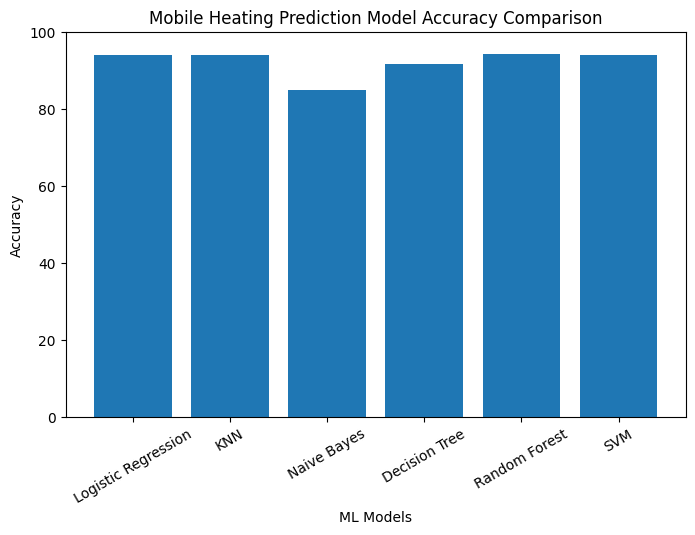

In [305]:
import matplotlib.pyplot as plt


models = [
    "Logistic Regression",
    "KNN",
    "Naive Bayes",
    "Decision Tree",
    "Random Forest",
    "SVM"
]

 
accuracies = [lr_acc, k_acc, nb_acc, dt_acc, rf_acc, svc_acc]


plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.title("Mobile Heating Prediction Model Accuracy Comparison")
plt.ylim(0, 100)
plt.xticks(rotation=30)
plt.show()

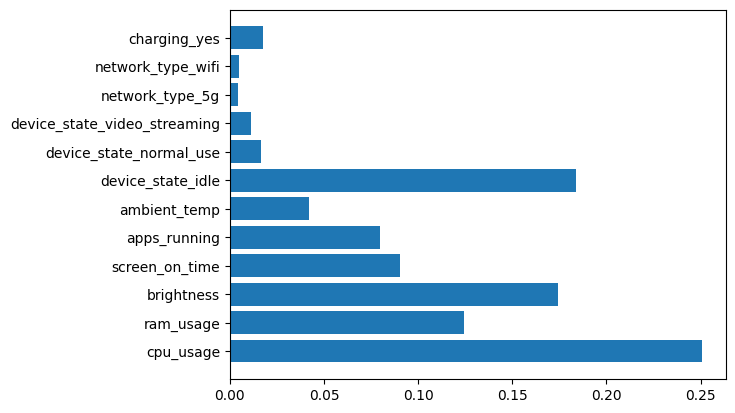

In [306]:
import matplotlib.pyplot as plt

importance = rf.feature_importances_
plt.barh(x.columns, importance)
plt.show()

In [307]:
df.tail()

,cpu_usage,ram_usage,brightness,screen_on_time,apps_running,ambient_temp,overheating,device_state_idle,device_state_normal_use,device_state_video_streaming,network_type_5g,network_type_wifi,charging_yes
9995,46,72.7,34,1.05,8.0,25.49,1,False,True,False,False,False,False
9996,99,91.4,83,4.85,21.0,25.82,1,False,False,False,True,False,True
9997,70,80.1,85,4.56,17.0,31.85,1,False,False,False,False,True,True
9998,29,31.1,41,3.78,8.0,34.51,1,False,True,False,False,False,False
9999,9,22.1,37,0.46,1.0,33.03,1,True,False,False,True,False,True


In [308]:
x.columns

Index(['cpu_usage', 'ram_usage', 'brightness', 'screen_on_time',
       'apps_running', 'ambient_temp', 'device_state_idle',
       'device_state_normal_use', 'device_state_video_streaming',
       'network_type_5g', 'network_type_wifi', 'charging_yes'],
      dtype='object')

In [309]:
sample=pd.DataFrame([{'cpu_usage':75, 'ram_usage':68, 'brightness':85, 'screen_on_time':4,
       'apps_running':18, 'ambient_temp':32, 'device_state_idle':1,
       'device_state_normal_use':0, 'device_state_video_streaming':0,
       'network_type_5g':1, 'network_type_wifi':0, 'charging_yes':1}])

In [310]:
scaler=StandardScaler()
scaler.fit(sample)
sample_scaled=scaler.transform(sample)
rf.predict(sample_scaled)

array([1])

In [311]:
import pandas as pd

sample = pd.DataFrame([[15, 25, 25, 0.5, 2, 27, 1, 0, 0, 0, 1, 0]],columns=x.columns)

sample_scaled = scaler.transform(sample)  
rf.predict(sample_scaled)

array([0])

In [ ]:
import pandas as pd

sample = pd.DataFrame([[35, 40, 45, 2, 8, 29, 0, 1, 0, 0, 1, 0]],columns=x.columns)

sample_scaled = scaler.transform(sample)
rf.predict(sample_scaled)

array([0])

In [313]:
import joblib

joblib.dump(rf,'rf_model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']